# Aravinth R - 19MIC0053
# Lab Experiment - 5

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('/Users/aravinth/Desktop/Data Warehousing/Assignment 5/PatientData.csv')
dataset.head(20)

,Name,Gender,Weight,BMI,Condition,Strict_Diet
0,Pranauv,Male,60,19.3,Healthy,No
1,Purusothaman,Male,63,18.0,Underweight,Yes
2,Shyam,Male,55,17.0,Underweight,Yes
3,Nithin,Male,80,28.0,Oveweight,Yes
4,Rohit,Male,70,22.0,Healthy,No
5,Aravinth,Male,50,17.5,Underweight,Yes
6,Barani,Male,60,20.0,Healthy,No
7,Niketha,Female,60,21.0,Healthy,No
8,Krithiik,Male,60,26.0,Oveweight,Yes
9,Kumaaravel,Male,80,27.0,Oveweight,Yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         25 non-null     object 
 1   Gender       25 non-null     object 
 2   Weight       25 non-null     int64  
 3   BMI          25 non-null     float64
 4   Condition    25 non-null     object 
 5   Strict_Diet  25 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ KB


In [6]:
dataset.describe()

,Weight,BMI
count,25.000000,25.000000
mean,63.800000,21.860000
std,10.816654,4.108629
min,45.000000,16.000000
25%,60.000000,19.200000
50%,60.000000,22.000000
75%,70.000000,24.000000
max,90.000000,32.000000


In [7]:
dataset.isnull().sum()

Name           0
Gender         0
Weight         0
BMI            0
Condition      0
Strict_Diet    0
dtype: int64

In [8]:
dataset.drop_duplicates(inplace=True)
X = dataset.iloc[:, [2, 3]].values

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


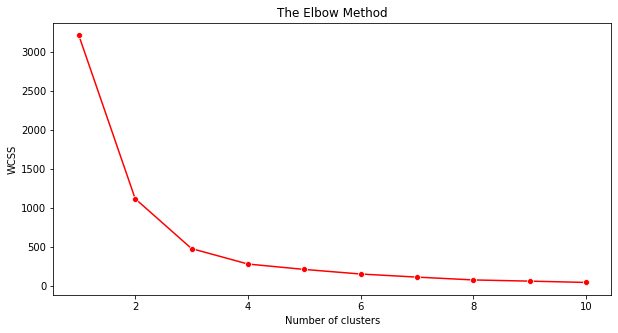

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

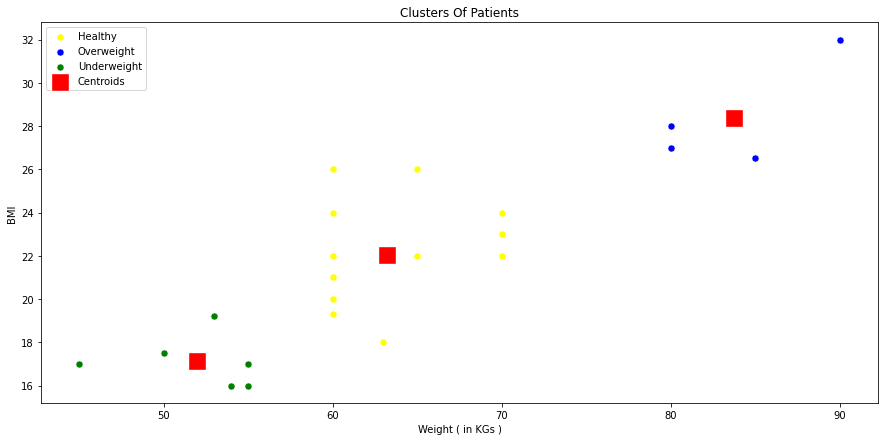

In [12]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Healthy',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Overweight',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Underweight',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters Of Patients')
plt.xlabel('Weight ( in KGs )')
plt.ylabel('BMI')
plt.legend()
plt.show()